In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('survey_results_public.csv')

In [2]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
df=df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]]
df=df.rename({"ConvertedComp":"Salary"},axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [4]:
df.isnull().sum()

Country           389
EdLevel          7030
YearsCodePro    18112
Employment        607
Salary          29705
dtype: int64

In [5]:
df=df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  object 
 1   EdLevel       34188 non-null  object 
 2   YearsCodePro  34621 non-null  object 
 3   Employment    34717 non-null  object 
 4   Salary        34756 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [7]:
df=df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [8]:
df=df[df["Employment"]=="Employed full-time"]
df=df.drop("Employment",axis=1)
df.head(20)

,Country,EdLevel,YearsCodePro,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,40070.0
11,Spain,Some college/university study without earning ...,7,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,38916.0
13,United States,"Associate degree (A.A., A.S., etc.)",1,66000.0
16,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,79000.0
17,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,1260000.0
18,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,83400.0
23,Germany,"Professional degree (JD, MD, etc.)",20,91883.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30019 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       30019 non-null  object 
 1   EdLevel       30019 non-null  object 
 2   YearsCodePro  30019 non-null  object 
 3   Salary        30019 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [10]:
df["Country"].value_counts()

United States     7569
India             2425
United Kingdom    2287
Germany           1903
Canada            1178
                  ... 
Benin                1
Fiji                 1
San Marino           1
Guinea               1
Andorra              1
Name: Country, Length: 154, dtype: int64

In [11]:
def shorten_categories(categories,cutoff):
    categorical_map={}
    for i in range(len(categories)):
        if categories.values[i]>=cutoff7:
            categorical_map[categories.index[i]]=categories.index[i]
        else:
             categorical_map[categories.index[i]]='other'
    return categorical_map                       

In [12]:
country_map= shorten_categories(df.Country.value_counts(),400)
df['Country']=df['Country'].map(country_map)
df.Country.value_counts()

other                 8549
United States         7569
India                 2425
United Kingdom        2287
Germany               1903
Canada                1178
Brazil                 991
France                 972
Spain                  670
Australia              659
Netherlands            654
Poland                 566
Italy                  560
Russian Federation     522
Sweden                 514
Name: Country, dtype: int64

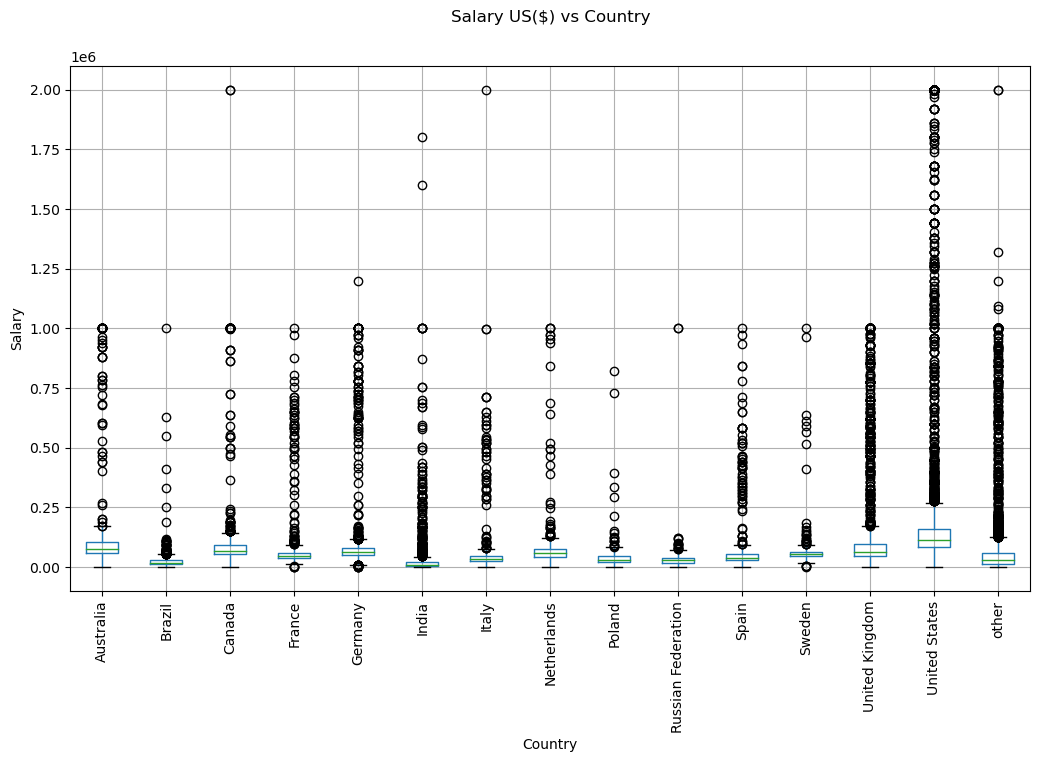

In [13]:
fig, ax=plt.subplots(1,1, figsize=(12,7))
df.boxplot('Salary','Country',ax=ax)
plt.suptitle('Salary US($) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [14]:
df=df[df['Salary']<=250000]
df=df[df['Salary']>=10000]
df=df[df['Country']!= 'other']


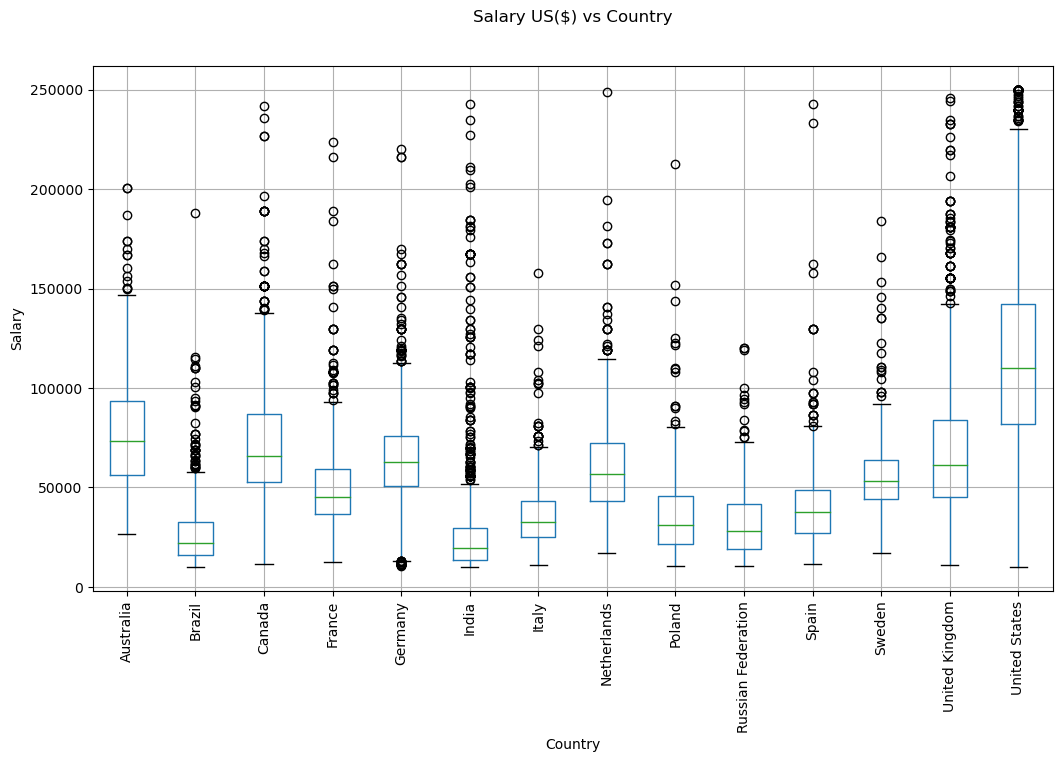

In [15]:
fig, ax=plt.subplots(1,1, figsize=(12,7))
df.boxplot('Salary','Country',ax=ax)
plt.suptitle('Salary US($) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [16]:
df["YearsCodePro"].unique()


array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '29', '6', '28',
       '8', '23', '15', '25', '9', '11', 'Less than 1 year', '5', '21',
       '16', '18', '14', '32', '19', '22', '38', '30', '26', '27', '17',
       '24', '34', '35', '33', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49'], dtype=object)

In [17]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    try:
        return float(x)
    except ValueError:
        return None

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

df["YearsCodePro"].unique()

array([13. ,  4. ,  2. ,  7. , 20. ,  1. ,  3. , 10. , 12. , 29. ,  6. ,
       28. ,  8. , 23. , 15. , 25. ,  9. , 11. ,  0.5,  5. , 21. , 16. ,
       18. , 14. , 32. , 19. , 22. , 38. , 30. , 26. , 27. , 17. , 24. ,
       34. , 35. , 33. , 36. , 40. , 39. , 50. , 31. , 37. , 41. , 45. ,
       42. , 44. , 43. , 49. ])

In [18]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [19]:
def clean_education(x):
    if  'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if  'Master’s degree' in x:
        return 'Master’s degree'
    if  'Professional degree 'in x or 'Other doctoral degree' in x:
        return 'post grad'
    return 'less that a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)
df["EdLevel"].unique()

array(['Bachelor’s degree', 'Master’s degree', 'less that a Bachelors',
       'post grad'], dtype=object)

In [20]:
from sklearn.preprocessing import LabelEncoder
le_education=LabelEncoder()
df['EdLevel']=le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()



array([0, 1, 2, 3])

In [21]:
le_country=LabelEncoder()
df['Country']=le_country.fit_transform(df['Country'])
df['Country'].unique()

array([13, 12, 10,  7,  4,  2,  6,  1,  3,  5, 11,  8,  0,  9])

In [22]:
x=df.drop("Salary",axis=1)
y=df["Salary"]

In [23]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(x, y)

LinearRegression()

In [24]:
y_pred=linear_reg.predict(x)

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
error=np.sqrt(mean_squared_error(y,y_pred))

In [26]:
error

39200.2832090899

In [27]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg=DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(x,y.values)

DecisionTreeRegressor(random_state=0)

In [28]:
y_pred=dec_tree_reg.predict(x)

In [29]:
error=np.sqrt(mean_squared_error(y,y_pred))

In [30]:
error

29414.938206831015

In [31]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x,y.values)

SVR()

In [32]:
y_pred=svr.predict(x)

In [33]:
error=np.sqrt(mean_squared_error(y,y_pred))   

In [34]:
error

48076.37014552882

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(x,y)

RandomForestRegressor()

In [36]:
y_pred = rf_regressor.predict(x)

In [37]:
error=np.sqrt(mean_squared_error(y,y_pred))   

In [38]:
error

29490.000956530963

In [39]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.5)

lasso_reg.fit(x,y)

y_pred = lasso_reg.predict(x)

error= mean_squared_error(y, y_pred)
error


1536662203.9823132

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

regressor = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 5, 10],       # Maximum depth of trees
    'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split a node
}

# Perform grid search with cross-validation
gs = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5)
gs.fit(x,y.values)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [41]:
regressor = gs.best_estimator_

regressor.fit(x, y.values)
y_pred = regressor.predict(x)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$29,985.25


In [42]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(x, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [43]:
regressor = gs.best_estimator_

regressor.fit(x, y.values)
y_pred = regressor.predict(x)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$30,466.60


In [44]:
x

,Country,EdLevel,YearsCodePro
7,13,0,13.0
9,12,1,4.0
10,12,0,2.0
11,10,2,7.0
12,7,2,20.0
...,...,...,...
64113,13,2,15.0
64116,13,0,6.0
64122,13,2,4.0
64127,13,3,12.0


In [45]:
x=np.array([["United States",'Master’s degree','15']])
x             

array([['United States', 'Master’s degree', '15']], dtype='<U15')

In [46]:
x[:, 0] = le_country.transform(x[:, 0])
x[:, 1] = le_education.transform(x[:, 1])
x = x.astype(float)
print(x)

[[13.  1. 15.]]


In [47]:
y_pred=regressor.predict(x)
y_pred

C:\Users\Dell\conda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([139554.17730496])

In [48]:
import pickle

In [49]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [50]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [51]:
y_pred = regressor_loaded.predict(x)
y_pred

C:\Users\Dell\conda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([139554.17730496])